Data Anlaysis Project for Titanic Dataset  

  
Questions want to answer: What vairable is more relevant for survived rate?

#1 Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
titanic_data = pd.read_csv('C:/Users/hongy/Desktop/dataanalyst/data analysis project/titanic-data.csv')

Look at dataset through head and tail, and also look at format for different variables.
Pclass is the Ticket-class: first (1), second (2), and third (3) class tickets were used. This is an ordinal integer feature.

Name is the name of the passenger. The names also contain titles and some persons might share the same surname; indicating family relations. We know that some titles can indicate a certain age group. For instance Master is a boy while Mr is a man. This feature is a character string of variable length but similar format.

Sex is an indicator whether the passenger was female or male. This is a categorical text string feature.

Age is the integer age of the passenger. There are NaN values in this column.

SibSp is another ordinal integer feature describing the number of siblings or spouses travelling with each passenger.

Parch is another ordinal integer features that gives the number of parents or children travelling with each passenger.

Ticket is a character string of variable length that gives the ticket number.

Fare is a float feature showing how much each passenger paid for their rather memorable journey.

Cabin gives the cabin number of each passenger. There are NaN in this column. This is another string feature.

Embarked shows the port of embarkation as a categorical character value.

In summary we have 1 floating point feature (Fare), 1 integer variable (Age), 3 ordinal integer features (Plcass, SibSp, Parch), 2 categorical text features (Sex, Embarked), and 3 text string features (Ticket, Cabin, Name).

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Look at basic statistics for variables, and the frequency information.  
As we can see, there are 891 points in the dataset, 38% of the passengers survived, there are missing values in the age column, there are 3 classes, there are sibsp numbers ranging from 0 to 8, there are parch number ranging from 0 to six, and there are fare amount ranging from 0 to 512 within the mean 32.2.

In [7]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We noticed that there are some missing values in the variable 'Age' and 'Embarked'. So we will use the following step to fill missing values.
1. Filling missing age with the median value of 'Age'
2. Filling missing Embarked with the most frequecy value of 'Embarked'

There are certain limitaion cause filling the data with median value or mode value will not probably represent the real situation. But that's the best we can do under the learning so far.

In [8]:
age_value = titanic_data.Age.median()
titanic_data['Age'] = titanic_data['Age'].fillna(age_value)

embarked_value = titanic_data.Embarked.dropna().mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(embarked_value)

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Beckwith, Mr. Richard Leonard",male,1601,B96 B98,S
freq,1,577,7,4,646


#2 Data Exploration

Look at the basic distribution for several variables.

Single variable exploration:  
For survived data, we can see that 38.4% of people have survived and 61.6% of people have died

In [34]:
#survived
new_survived = pd.Categorical(titanic_data['Survived'])
new_survived = new_survived.rename_categories(['Died','Survived'])              

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


For pclass data, we can see that class1 take up 24%, class2 take up 20%, the the majority of Pclass is class3, which is 55%.

In [35]:
#Pclass
new_pclass = pd.Categorical(titanic_data['Pclass'])
new_pclass = new_pclass.rename_categories(['Class1','Class2','Class3'])

new_pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


For age data, we can see that there are about 8% children in the total population, and 16.8% of seniors. The rest of the majority are 75% of adults.

In [44]:
#Age
titanic_data['Age_Cust'] = pd.cut(titanic_data['Age'], bins=[0,13,40,90], labels=['Childs','Adults','Seniors'])
new_age = pd.Categorical(titanic_data['Age_Cust'])

new_age.describe()

,counts,freqs
categories,,
Childs,71,0.079686
Adults,670,0.751964
Seniors,150,0.168350


For sex data, there are 35% of the passengers are female, and the rest of 65% are all male.

In [46]:
#Sex
new_sex = pd.Categorical(titanic_data['Sex'])

new_sex.describe()

,counts,freqs
categories,,
female,314,0.352413
male,577,0.647587


Look at the suvived rate for different Pclasses, and we found out that different Pclasses have very different suvived rate.  
Survived rate: P1 > P2 > P3

In [47]:

pclass_survived = titanic_data.groupby(['Pclass'], as_index = False)
pclass_survived_rate = pclass_survived[['Pclass','Survived']].mean().sort_values(by = 'Survived', ascending = False)
print(pclass_survived_rate)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Look at the suvived rate for sex, and we found out that different sex have very different suvived rate.  
Female tend to have much more higher survived rate than male.

In [48]:
Sex_survived = titanic_data.groupby(['Sex'], as_index = False)
Sex_survived_rate = Sex_survived[['Sex','Survived']].mean().sort_values(by = 'Survived', ascending = False)
print(Sex_survived_rate)

      Sex  Survived
0  female  0.742038
1    male  0.188908


Look at the suvived rate for SibSp, and we found out that different SibSp have very different suvived rate.  
The one who has 1 or 2 SibSp has higher survived rate than others.

In [49]:
Sib_survived = titanic_data.groupby(['SibSp'], as_index = False)
Sib_survived_rate = Sib_survived[['SibSp','Survived']].mean().sort_values(by = 'Survived', ascending = False)
print(Sib_survived_rate)

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Look at the suvived rate for parent&children number, and we found out that different parent&children number have very different suvived rate.  
The one who has 1,2 or 3 parent&children numbers has higher survived rate than others.

In [50]:
Parch_survived = titanic_data.groupby(['Parch'], as_index = False)
Parch_survived_rate = Parch_survived[['Parch','Survived']].mean().sort_values(by = 'Survived', ascending = False)
print(Parch_survived_rate)

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


#3 Data Visualization

Here are the plots for different age in survived or not srivived group.  
The following plots show:  
1. Children tend to have higher survived rate.
2. The survived rate for seniors and adults are similar.
3. The oldest people which is nearly 80 yrs old has survived.

In [73]:
titanic_data['Survived_new'] = 'None'
titanic_data['Survived_new'].loc[titanic_data['Survived'] == 0] = 'Died'
titanic_data['Survived_new'].loc[titanic_data['Survived'] == 1] = 'Survived'



D:\datascience\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


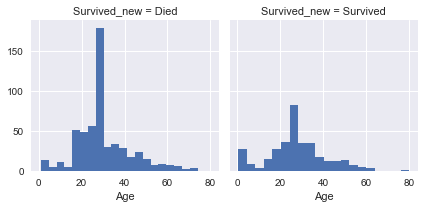

In [74]:
age_plot = sns.FacetGrid(titanic_data, col = 'Survived_new')
age_plot.map(plt.hist, 'Age', bins = 20)

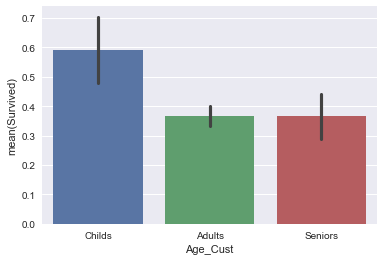

In [62]:
sns.barplot('Age_Cust','Survived', data=titanic_data)

Here are the plots for different age divided by Pclass in survived or not srivived group.
The following plots show:
1. Pclass 1 tend to have older age and have higher survived rate.
2. In Pclass 2 all the children have survived.
3. Pclass 3 have more people and the lowest survived rate. And the people who survived are mostly in age 0-40 yrs old.

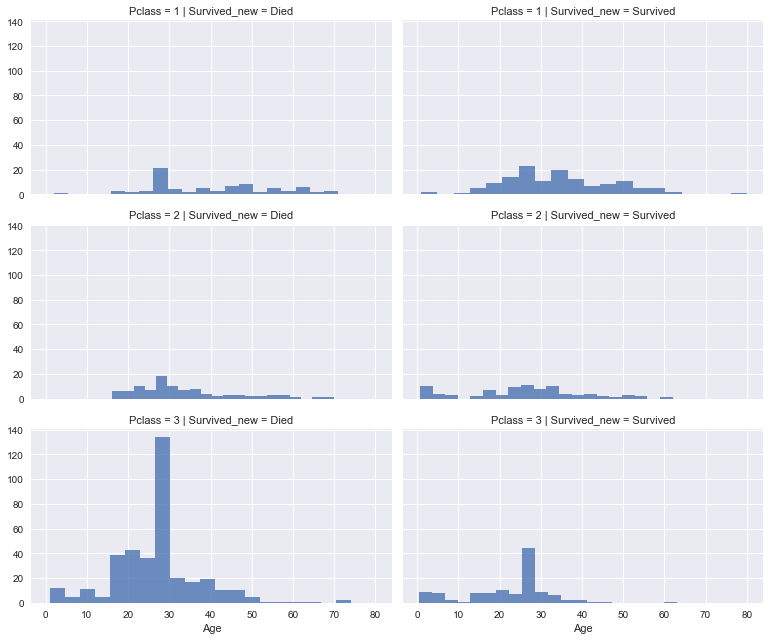

In [75]:
grid = sns.FacetGrid(titanic_data, col = 'Survived_new', row = 'Pclass', aspect = 1.8)
grid.map(plt.hist, 'Age', alpha = 0.8, bins = 20)

Here are the plots for different survived rate for different embarked location divided by sex in Pclass group. The following plots show:
1. When embarked = S, female have high survived rate than male, especially in Pclass 1 and Pclass 2.
2. When embarked = C, female have high survived rate than male, especially in Pclass 1 and Pclass 2. Same as the first one.
3. When enbarked = Q, the situation is similar to the first one. But the survived rate for male are extremely low. And even for pclass 3 the survived rate is not close.

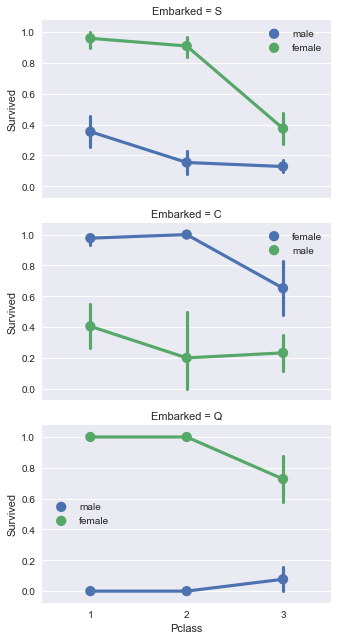

In [77]:
grid1 = sns.FacetGrid(titanic_data, row = 'Embarked', aspect = 1.6)
bp = grid1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
for i in range(0,3):
    grid1.axes[i][0].legend()

Here are the plots in different embarked locations, how fare amount distributed by sex an survived group. The following plots show:
1. People have higher fare amount tend to have higher survived rate. 
2. But for embarked = Q, there is no difference for the fare amount when looking at survived ot not


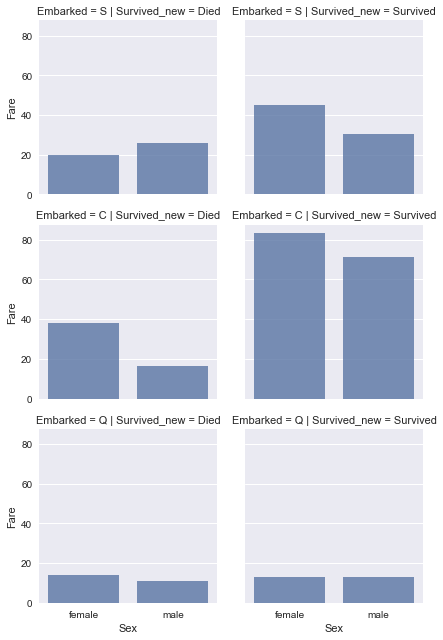

In [78]:
grid2 = sns.FacetGrid(titanic_data, row = 'Embarked', col = 'Survived_new')
grid2.map(sns.barplot, 'Sex', 'Fare', alpha = 0.8, ci = None)
grid2.add_legend()

There are different titles in people's name, so we might want to also look at is there any relations between people's title and their survived rate.  
Here are the methods to get people's titles.

In [79]:
def get_title(name):
    if '.' in  name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'unknown'


In [80]:
titles = sorted(set([x for x in titanic_data.Name.map(lambda x: get_title(x))]))
print('different titles in the dataset')
print(len(titles), ':', titles)


different titles in the dataset
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [81]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if x['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [82]:
titanic_data['Title'] = titanic_data['Name'].map(lambda x: get_title(x)) 
titanic_data['Title'] = titanic_data.apply(replace_titles, axis=1)

We catergorized people's title into four categories.  
We found out that 'Mr' tend to have the lowest survived rate, and 'Mrs', 'Miss' and 'Master' tend to have very hign survived rate.

In [83]:
print(titanic_data.Title.value_counts())

Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64


In [84]:
titanic_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.160149
3,Mrs,0.798450


Then we want to combine Parch and SibSp together and create a new variable called 'Family'.  
If Family = 0, that means one has no family members on the ship.  
If Family = 1, that means one have at least one family members on the ship.  
  
And we found that the one who have family members tend to have higher survived rate.

In [85]:
#titanic_data.head()

titanic_data['Family'] = titanic_data['Parch'] + titanic_data['SibSp']
titanic_data['Family'].loc[titanic_data['Family'] > 0] =1
titanic_data['Family'].loc[titanic_data['Family'] == 0] =0

D:\datascience\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [86]:
titanic_data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.303538
1,1,0.505650


#4 Variable Correlations   

Finally we want to look at different variables' correlation with survived or not.  
But first we need to transfer all the categorical variable into numerical, and drop all the useless variables.

In [87]:
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 1, 'male': 0}).astype(int)


In [88]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cust,Survived_new,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Died,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adults,Survived,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Survived,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adults,Survived,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adults,Died,Mr,0


In [89]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4}
titanic_data['Title'] = titanic_data['Title'].map(title_mapping)
titanic_data['Title'] = titanic_data['Title'].fillna(0)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cust,Survived_new,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Died,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adults,Survived,3,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Survived,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adults,Survived,3,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adults,Died,1,0


In [90]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q':2}).astype(int)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cust,Survived_new,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Adults,Died,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Adults,Survived,3,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adults,Survived,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adults,Survived,3,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adults,Died,1,0


In [91]:
titanic_data = titanic_data.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_Cust,Survived_new,Title,Family
0,0,3,0,22.0,7.2500,0,Adults,Died,1,1
1,1,1,1,38.0,71.2833,1,Adults,Survived,3,1
2,1,3,1,26.0,7.9250,0,Adults,Survived,2,0
3,1,1,1,35.0,53.1000,0,Adults,Survived,3,1
4,0,3,0,35.0,8.0500,0,Adults,Died,1,0


The following colum shows survived rate's correlations with different variables.  
1. The pclass tend to has a negative correlation with survived rate.
2. Female tend to have higher survived rate.
3. Age's correlation with survived rate is not linear according to our previous findings.
4. Fare tend to have slight positive correlation with survived rate.
5. Embarked tend to have low correlation with survived rate.
6. Title tend to have high positve correlation with survived rate.
7. Family member number on board tend to have positive correlation with survived rate.

In [92]:
titanic_data.corr().iloc[0]

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.064910
Fare        0.257307
Embarked    0.106811
Title       0.490000
Family      0.203367
Name: Survived, dtype: float64

#5 Conclusions  

Insights:
1. Female tend to have higher survived rate, and it can also be revealed in the relations between Tittle and survived rate.
2. Different Pclass have differnet survived rate, combining this finding with the relationship between fare and survived rate, we can probably say that the wealthy tend to have higher survived rate.
3. From the previous graph, we can tell that children tend to have higher survived rate.
4. The one who has family member on the ship tend to have higher survived rate.  

  
  
Limitations:
1. All the correlation don't stand for cause relationships, so we cannot say these feature all cause someone more likely to survive. But it's interesting to look at all these patterns.
2. The age column has some missing value, and we fill them with the median age, which may be missleading to the final results.
3. Since there is an uneven distribution between the genders might tilt the results.
4. There are some useful information if we could get that will be very helpful for the analysis, such as the people's eduacation level or whether a person belong to the crew members or not.